In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_excel(r"C:\Users\Administrator\Downloads\Air_BNB.xlsx")

In [3]:
data.head(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,strict,1.0,t,100.0,1.0,1.0,4.442651
6,11825529,Entire home/apt,3.0,1.0,moderate,1.0,t,97.0,1.0,1.0,4.418841
7,13971273,Entire home/apt,2.0,1.0,moderate,1.0,f,93.0,1.0,1.0,4.787492
8,180792,Private room,2.0,1.0,moderate,1.0,f,99.0,1.0,1.0,4.787492
9,5385260,Private room,2.0,1.0,moderate,1.0,t,90.0,1.0,1.0,3.583519


In [4]:
data.drop('id', axis = 1, inplace = True)

In [5]:
data

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [6]:
print("the number of columns is : ", data.shape[1])
print("the number of rows is : ", data.shape[0])

the number of columns is :  10
the number of rows is :  74111


In [7]:
round(data.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [8]:
data.dtypes

room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee            float64
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object

In [9]:
print("number of unique room type is : ",data['room_type'].nunique())
print(data['room_type'].value_counts())

number of unique room type is :  3
room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64


##### Imputating missing values

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(54117, 10)

In [12]:
data.info()
# here we can see that there is null values in the dataset 


<class 'pandas.core.frame.DataFrame'>
Index: 54117 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             54112 non-null  object 
 1   accommodates          54114 non-null  float64
 2   bathrooms             53922 non-null  float64
 3   cancellation_policy   54109 non-null  object 
 4   cleaning_fee          54113 non-null  float64
 5   instant_bookable      54117 non-null  object 
 6   review_scores_rating  43902 non-null  float64
 7   bedrooms              54025 non-null  float64
 8   beds                  53992 non-null  float64
 9   log_price             54117 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB


In [13]:
data.isnull().sum()
## number of null values in each column

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

## Null Value Treatment


In [14]:
data = pd.get_dummies(data, columns=['room_type', 'cancellation_policy', 'instant_bookable'], drop_first=True)


In [15]:
data

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,False,False,False,True,True


In [16]:
## filling the null values
for col in data.columns:
    if data[col].dtype == 'object':
        mode = data[col].mode()
        data[col] = data[col].fillna(mode)
    else:
        median = data[col].median()
        data[col] = data[col].fillna(median)

In [17]:
data.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

## Outliers Detection and treatment

<function matplotlib.pyplot.show(close=None, block=None)>

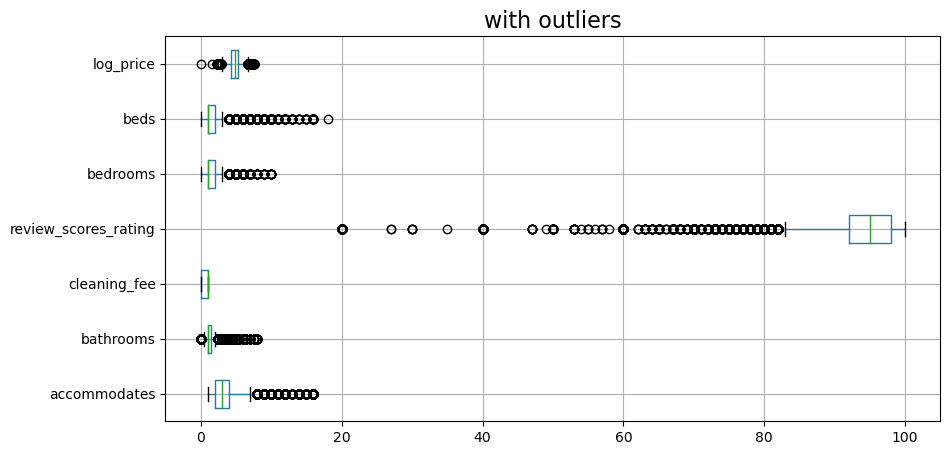

In [18]:
cont = data.dtypes[(data.dtypes !='uint8') & (data.dtypes != 'bool')].index
plt.figure(figsize = (10,5))
data[cont].boxplot(vert = 0)
plt.title('with outliers', fontsize = 16)
plt.show

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [20]:
for col in data.columns:
    if data[col].dtype != 'uint8' and data[col].dtype != 'bool':  # Exclude one-hot encoded and boolean columns
        lr, ur = remove_outlier(data[col])
        data[col] = np.where(data[col] > ur, ur, data[col])
        data[col] = np.where(data[col] < lr, lr, data[col])

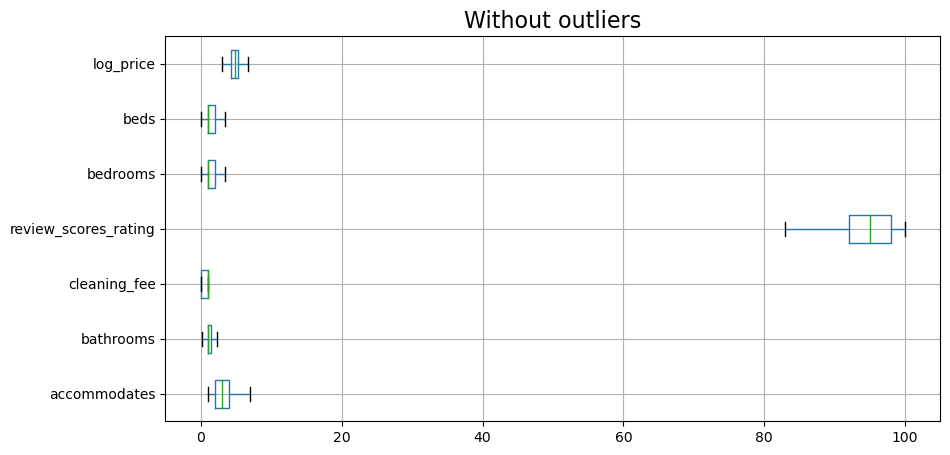

In [21]:
cont = data.dtypes[(data.dtypes != 'uint8') & (data.dtypes != 'bool')].index
plt.figure(figsize=(10, 5))
data[cont].boxplot(vert=0)
plt.title('Without outliers', fontsize=16)
plt.show()

### Data Distribution 


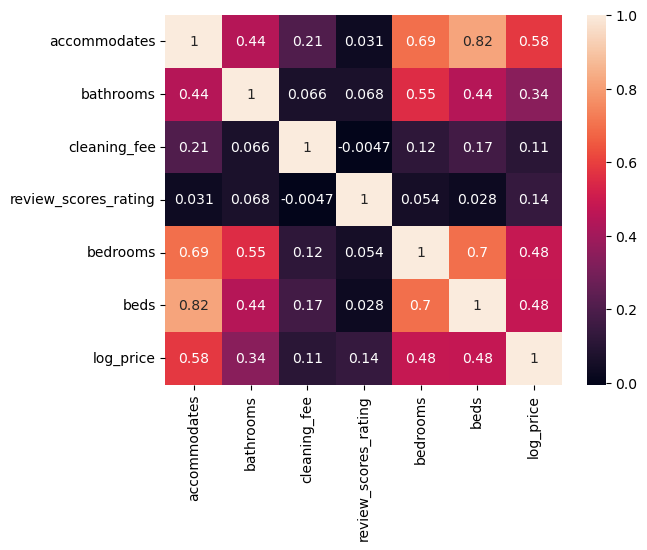

In [22]:
import seaborn as sns
sns.heatmap(data[cont].corr(),annot = True)
plt.show()

C:\Users\Administrator\anaconda3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


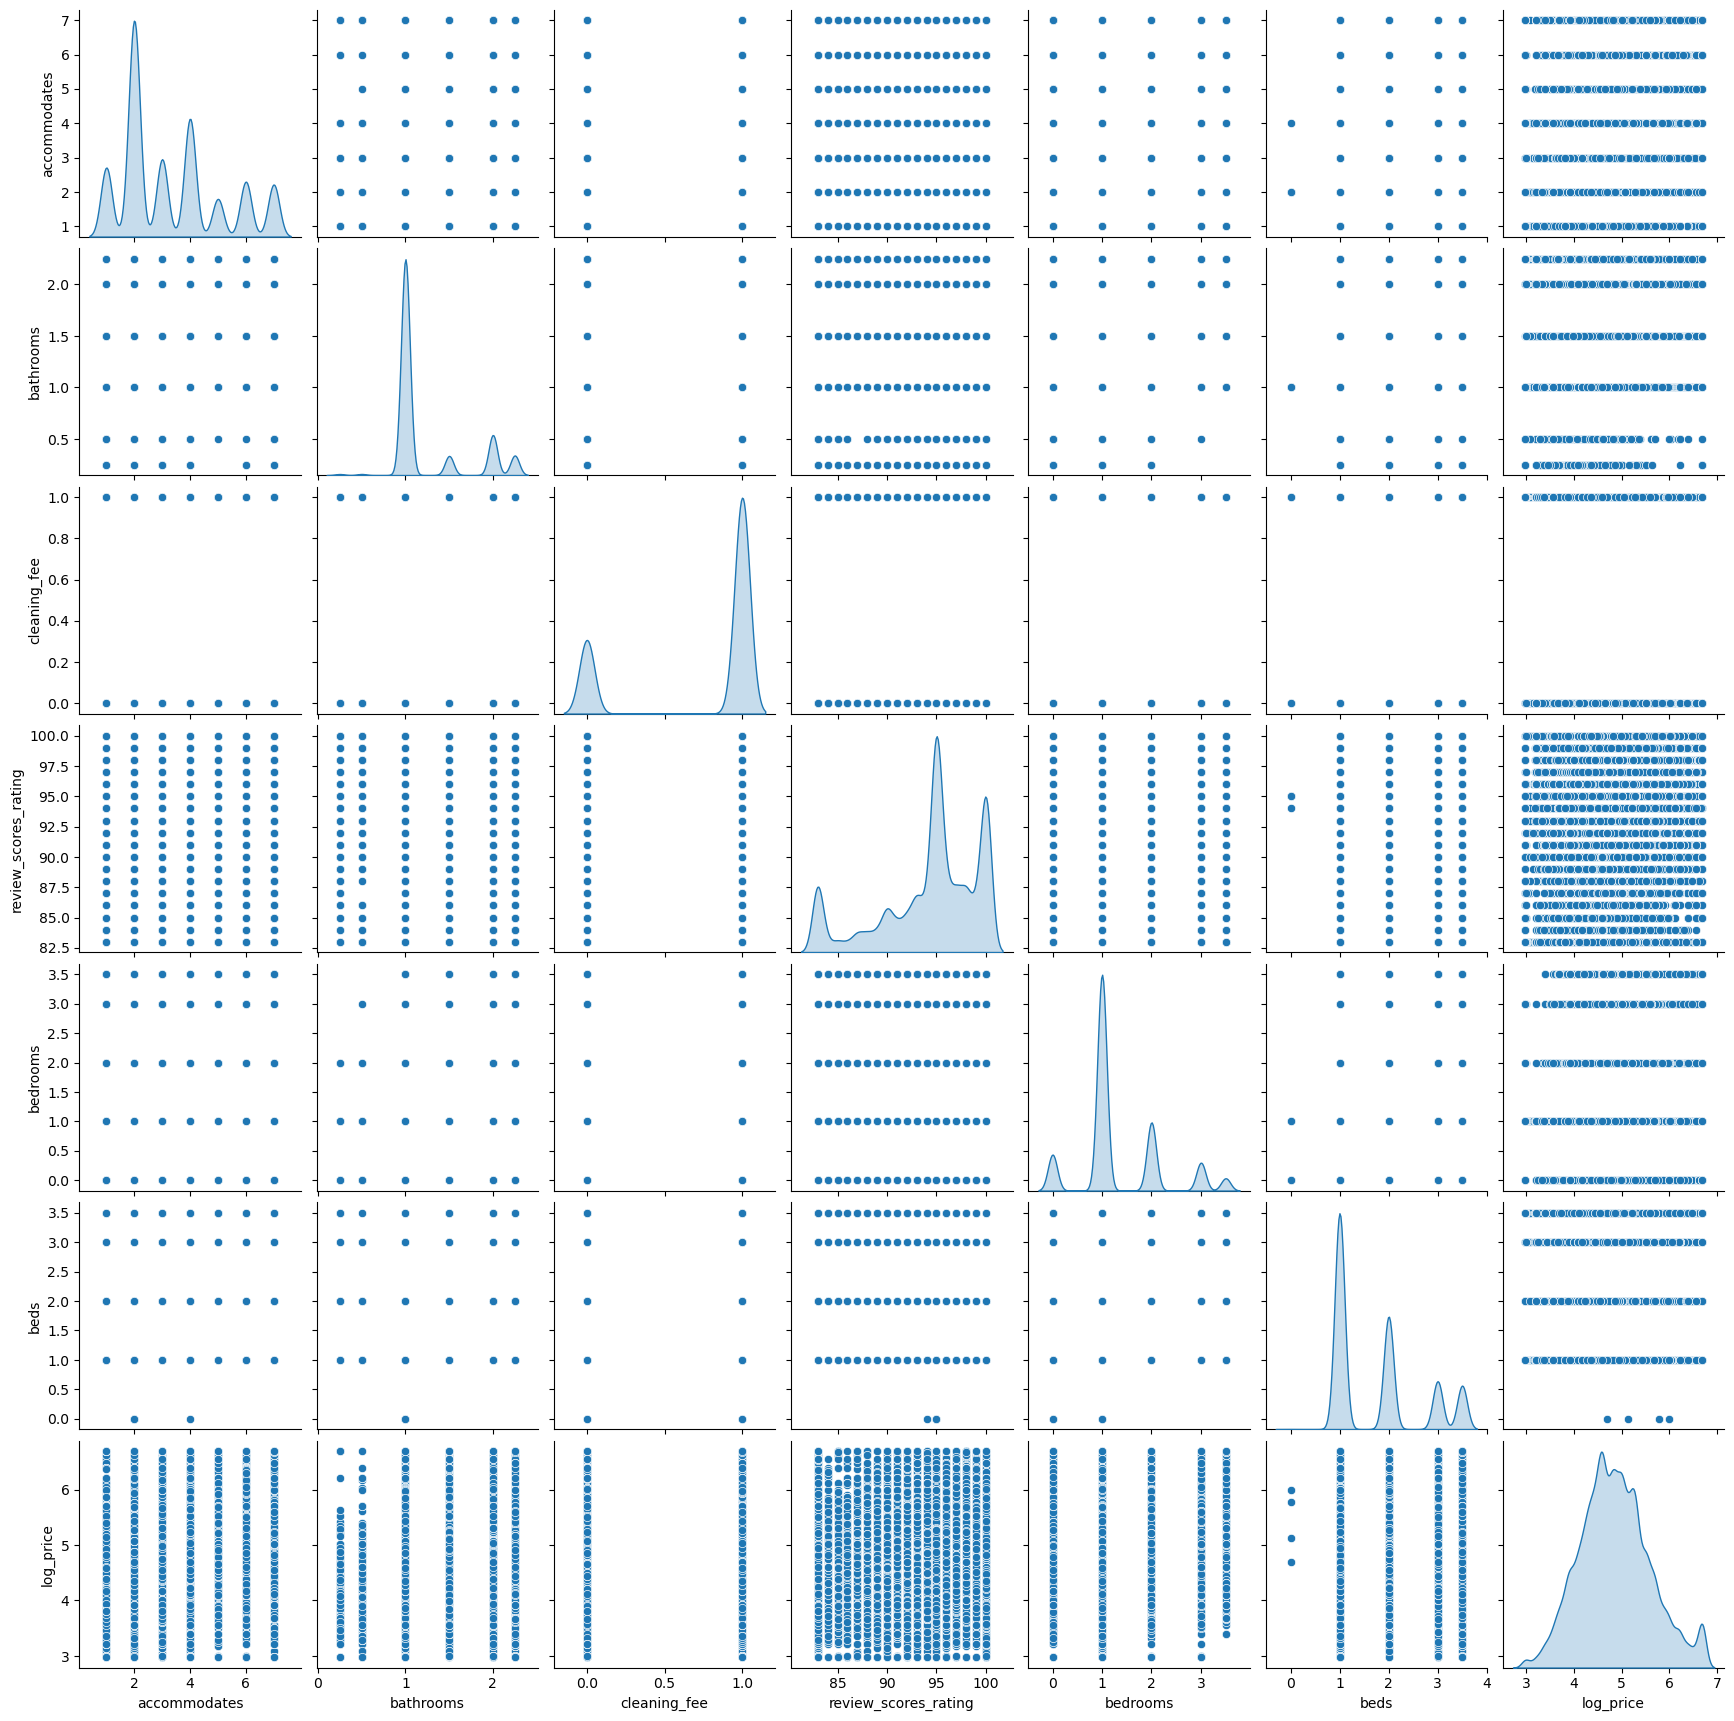

In [23]:
sns.pairplot(data[cont], diag_kind='kde')
plt.show()